# WeatherPy


In [1]:
# Dependencies
import random
import requests as req

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from citipy import citipy

import openweathermapy as owm

#To get the current date
import datetime
now = datetime.datetime.now()

Generate Cities List:


In [2]:
# Create a settings object with your API key and preferred units
api_key = "e873a660fa4ab2bd6007420be8e205d4"
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "imperial", "appid": api_key}

Perform API Calls:


In [3]:
# Latitude ranges from -90 to 90 and Longitude ranges from -180 to 180
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

# Setting Latitude and Longitude to ramdomly pick co-ordinates.
lat_samples=random.sample(lat,2500)
long_samples=random.sample(long,2500)

# Creating a dataframe from the randomly sample Latitude and Longitude
cities_df=pd.DataFrame({"Latitude":lat_samples,"Longitude":long_samples})

#Creating new columns City and Country for storing the details corresponding to the co-ordinates
cities_df["City"]=""
cities_df["Country"]=""

# Finding the city and the country code corresponding to the Latitude and Longitude
for index,row in cities_df.iterrows():
    city=citipy.nearest_city(row["Latitude"], row["Longitude"])
    cities_df.set_value(index, "City", city.city_name)
    cities_df.set_value(index, "Country", city.country_code)

# Dropping the Latitude and Longitude as they are values of the nearest city and not the excat co-ordinates of the city
cities_df=cities_df.drop(cities_df.columns[[0, 1]], axis=1)

# Deleting duplicate values from the list of cities and keeping only the first
cities_df=cities_df.drop_duplicates(['City'], keep='first')

# Randomly sampling a list of 800 cities 
cities_df=cities_df.sample(n=800)

# Resetting the index of the cities list
cities_df=cities_df.reset_index(drop=True)

cities_df.head()

C:\Users\mikef\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\mikef\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,City,Country
0,gueret,fr
1,mahebourg,mu
2,obo,cf
3,touros,br
4,padang,id


In [4]:
# Get data for each city in cities_df
weather_data = []

url="https://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&units=imperial&q="

print("\nStats Data Minning\n-----------------------------")
#Get the response from OpenWeatherMapY and storing the response into weather_data if response is found
for index,row in cities_df.iterrows():  
    print("\nProcessing record %s|%s,%s"%((index+1),row["City"],row["Country"]))
    print("\n"+url+"%s,%s"%(row["City"].replace(" ","+"),row["Country"]))
    try:
        response = owm.get_current("%s,%s"%(row["City"],row["Country"]), **settings)
        # Appending the response to the weather_Data
        weather_data.append(response)
    except:
        print("\n\033[1;31mCity not found. Skipping...\033[1;30m")

print("\n-----------------------------\nData Minning Completed\n-----------------------------")


Stats Data Minning
-----------------------------

Processing record 1|gueret,fr

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=gueret,fr

Processing record 2|mahebourg,mu

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=mahebourg,mu

Processing record 3|obo,cf

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=obo,cf

Processing record 4|touros,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=touros,br

Processing record 5|padang,id

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=padang,id

Processing record 6|umzimvubu,za

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=umzimvubu,za

City not found. Skipping...

Processing record 7|najran,sa

https:/


Processing record 54|porto empedocle,it

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=porto+empedocle,it

Processing record 55|grimari,cf

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=grimari,cf

City not found. Skipping...

Processing record 56|yambio,sd

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=yambio,sd

City not found. Skipping...

Processing record 57|sept-iles,ca

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=sept-iles,ca

Processing record 58|manacapuru,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=manacapuru,br

Processing record 59|tumannyy,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=tumannyy,ru

City not found. Skipp


City not found. Skipping...

Processing record 109|sombrio,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=sombrio,br

Processing record 110|zhigalovo,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=zhigalovo,ru

Processing record 111|karamea,nz

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=karamea,nz

City not found. Skipping...

Processing record 112|richards bay,za

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=richards+bay,za

Processing record 113|waingapu,id

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=waingapu,id

Processing record 114|yalutorovsk,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=yalutorovsk,ru

Processing record


Processing record 162|klaksvik,fo

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=klaksvik,fo

Processing record 163|tigil,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=tigil,ru

Processing record 164|deputatskiy,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=deputatskiy,ru

Processing record 165|juruti,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=juruti,br

Processing record 166|dhidhdhoo,mv

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=dhidhdhoo,mv

Processing record 167|camacha,pt

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=camacha,pt

Processing record 168|flin flon,ca

https://api.openweathermap.org/data/2.5/weather?appid=e


Processing record 216|itupiranga,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=itupiranga,br

Processing record 217|saint-philippe,re

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=saint-philippe,re

Processing record 218|springbok,za

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=springbok,za

Processing record 219|bogalusa,us

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=bogalusa,us

Processing record 220|correntina,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=correntina,br

Processing record 221|amboasary,mg

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=amboasary,mg

Processing record 222|gladstone,au

https://api.openweathermap.


Processing record 269|tasiilaq,gl

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=tasiilaq,gl

Processing record 270|vostok,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=vostok,ru

Processing record 271|yumen,cn

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=yumen,cn

Processing record 272|mudyuga,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=mudyuga,ru

City not found. Skipping...

Processing record 273|arcachon,fr

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=arcachon,fr

Processing record 274|fujin,cn

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=fujin,cn

Processing record 275|cheuskiny,ru

https://api.openweathermap.org/data/2.5/


Processing record 323|montague,ca

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=montague,ca

Processing record 324|baraboo,us

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=baraboo,us

Processing record 325|kigorobya,ug

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=kigorobya,ug

Processing record 326|trincomalee,lk

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=trincomalee,lk

Processing record 327|altamira,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=altamira,br

Processing record 328|karasjok,no

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=karasjok,no

Processing record 329|hambantota,lk

https://api.openweathermap.org/data/2.5/weat


Processing record 378|san patricio,mx

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=san+patricio,mx

Processing record 379|voh,nc

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=voh,nc

Processing record 380|coihaique,cl

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=coihaique,cl

Processing record 381|conde,br

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=conde,br

Processing record 382|utete,tz

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=utete,tz

Processing record 383|pevek,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=pevek,ru

Processing record 384|cape town,za

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2b


Processing record 430|kuusankoski,fi

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=kuusankoski,fi

Processing record 431|darhan,mn

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=darhan,mn

Processing record 432|bamako,ml

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=bamako,ml

Processing record 433|kuytun,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=kuytun,ru

Processing record 434|guerrero negro,mx

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=guerrero+negro,mx

Processing record 435|haibowan,cn

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=haibowan,cn

City not found. Skipping...

Processing record 436|ostrovnoy,ru

https://api.open

Processing record 483|tiarei,pf

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=tiarei,pf

Processing record 484|filadelfia,py

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=filadelfia,py

Processing record 485|san vicente,ph

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=san+vicente,ph

Processing record 486|anqing,cn

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=anqing,cn

Processing record 487|srednekolymsk,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=srednekolymsk,ru

Processing record 488|bathsheba,bb

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=bathsheba,bb

Processing record 489|letpadan,mm

https://api.openweathermap.org/data/2.5


Processing record 537|lebu,cl

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=lebu,cl

Processing record 538|tual,id

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=tual,id

Processing record 539|anadyr,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=anadyr,ru

Processing record 540|chambas,cu

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=chambas,cu

Processing record 541|tupik,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=tupik,ru

Processing record 542|nalut,ly

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=nalut,ly

Processing record 543|upala,cr

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&un


City not found. Skipping...

Processing record 593|zachepylivka,ua

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=zachepylivka,ua

Processing record 594|asau,tv

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=asau,tv

City not found. Skipping...

Processing record 595|slave lake,ca

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=slave+lake,ca

Processing record 596|boyolangu,id

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=boyolangu,id

Processing record 597|acapulco,mx

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=acapulco,mx

Processing record 598|bredasdorp,za

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=bredasdorp,za

Processing record 5


Processing record 645|ahipara,nz

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=ahipara,nz

Processing record 646|la ronge,ca

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=la+ronge,ca

Processing record 647|suksun,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=suksun,ru

Processing record 648|ocala,us

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=ocala,us

Processing record 649|umm kaddadah,sd

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=umm+kaddadah,sd

Processing record 650|barranca,pe

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=barranca,pe

Processing record 651|halalo,wf

https://api.openweathermap.org/data/2.5/weather?appid=e873


Processing record 699|baker city,us

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=baker+city,us

Processing record 700|bontang,id

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=bontang,id

Processing record 701|mehran,ir

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=mehran,ir

Processing record 702|banjar,id

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=banjar,id

Processing record 703|mount isa,au

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=mount+isa,au

Processing record 704|bilma,ne

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=bilma,ne

Processing record 705|nizhniy mamon,ru

https://api.openweathermap.org/data/2.5/weather?appid=e87


Processing record 751|ondorhaan,mn

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=ondorhaan,mn

City not found. Skipping...

Processing record 752|north atlanta,us

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=north+atlanta,us

Processing record 753|hendijan,ir

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=hendijan,ir

City not found. Skipping...

Processing record 754|havelock,us

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=havelock,us

Processing record 755|katangli,ru

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=katangli,ru

Processing record 756|sao filipe,cv

https://api.openweathermap.org/data/2.5/weather?appid=e873a660fa4ab2bd6007420be8e205d4&units=imperial&q=sao+filipe,cv

Processing re

In [5]:
# Create an "extracts" object to get the various parameter required to form the weather data table
summary = ["name","sys.country","dt","coord.lat", "coord.lon","main.temp_max","main.humidity","wind.speed","clouds.all"]

# Create a Pandas DataFrame with the results
data = [response(*summary) for response in weather_data]
column_names = ["City","Country","Date","Latitude", "Longitude","Temperature","Humidity","Wind speed","Cloudliness"]
weather_data = pd.DataFrame(data, columns=column_names)

weather_data.head()

,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Wind speed,Cloudliness
0,Guéret,FR,1586629022,46.17,1.87,72.00,30,9.17,31
1,Mahébourg,MU,1586628771,-20.41,57.70,78.01,73,13.87,75
2,Obo,CF,1586629023,5.40,26.49,74.25,71,2.68,77
3,Touros,BR,1586628740,-5.20,-35.46,87.80,66,13.87,20
4,Padang,ID,1586629023,-0.95,100.35,79.81,73,4.23,100


In [6]:
# Save the result to a csv file
weather_data.to_csv("Output/Weather_Data.csv")
# Count of the data in the dataframe
weather_data.count()

City           714
Country        714
Date           714
Latitude       714
Longitude      714
Temperature    714
Humidity       714
Wind speed     714
Cloudliness    714
dtype: int64

In [7]:
# Creating a function to set the properties of the graph
def plotprops(xlabelname,ylabelname,xlimits):
    plt.xlabel(xlabelname)
    plt.ylabel(ylabelname)
    plt.xlim(xlimits)
    plt.title("%s vs %s (%s/%s/%s)"%(xlabelname,ylabelname,now.month,now.day,now.year),fontsize=14)
    plt.grid(True)

Latitude vs Temperature Plot


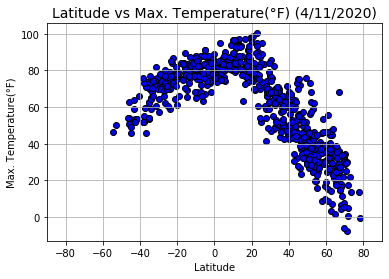

In [8]:
# Latitude vs Temperature(F)
plt.scatter(x=weather_data["Latitude"],y=weather_data["Temperature"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Max. Temperature(°F)",[-90,90])
plt.savefig("Output/City Latitude vs Temperature.jpeg")
plt.show()

Latitude vs. Humidity Plot

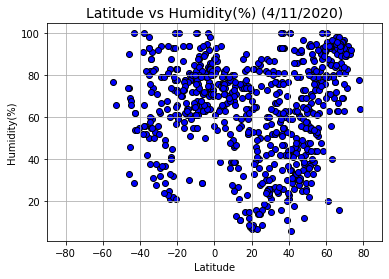

In [9]:
# Latitude vs Humidity

plt.scatter(x=weather_data["Latitude"],y=weather_data["Humidity"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Humidity(%)",[-90,90])
plt.savefig("Output/City Latitude vs Humidity.jpeg")
plt.show()

Latitude vs. Cloudiness Plot

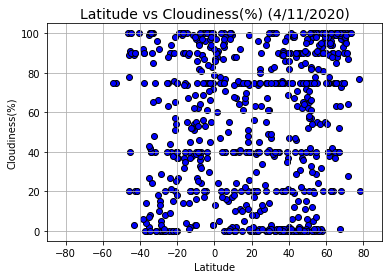

In [10]:
# Latitude vs Cloudliness  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Cloudliness"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Cloudiness(%)",[-90,90])
plt.savefig("Output/City Latitude vs Cloudiness.jpeg")
plt.show()

Latitude vs Wind Speed


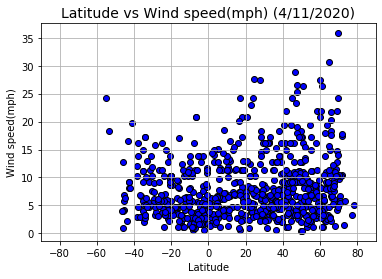

In [11]:
# Latitude vs Wind Speed  

plt.scatter(x=weather_data["Latitude"],y=weather_data["Wind speed"],facecolors="blue",edgecolors="black")
plotprops("Latitude","Wind speed(mph)",[-90,90])
plt.savefig("Output/City Latitude vs Wind speed.jpeg")
plt.show()